**Names: Alexandros Mylonas, Mandus Aldag**

The code to calculate the pi's was mainly taken from the lecture.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1.1 Just do one big experiment

In [ ]:
# First we'll generate the points we're interested in for many repeated experiments.

dimension = 2
n_experiments = 1
n_points_per_experiment = 10000

points = np.random.uniform(low=-1.0, high=1.0,
                           size=(dimension, n_points_per_experiment, n_experiments, ))

In [ ]:
# Next, check whether the points are in the circle

radius = (points**2).sum(axis=0)
inside_the_circle = (radius <= 1)
inside_the_square = ((-1.0 <= points[0]) & (points[0] <= 1.0) &
                     (-1.0 <= points[1]) & (points[1] <= 1.0))

pi_by_4 = inside_the_circle.sum(axis=0) / inside_the_square.sum(axis=0)
pi = 4 * pi_by_4
print(pi)

[3.138]


In [ ]:
mean_pi = np.mean(pi)
std_pi = np.std(4*inside_the_circle)
print("Mean PI = ",mean_pi)
print("Standard deviation = ",std_pi)

Mean PI =  3.138
Standard deviation =  1.6446750438916495


Since the standard deviation of a single experiment does not contain valuable information we calculate the standard deviation of the indicator variable $4[x^2 + y^2 \leq1]$.

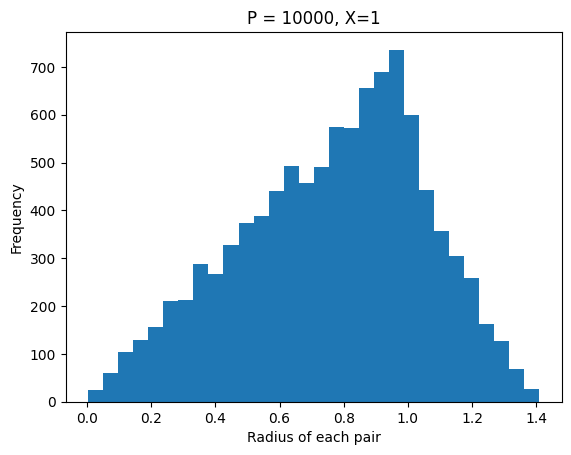

In [ ]:
rp = np.sqrt(radius)
plt.hist(rp,bins=30)
plt.xlabel("Radius of each pair")
plt.ylabel("Frequency")
plt.title("P = 10000, X=1")
plt.show()

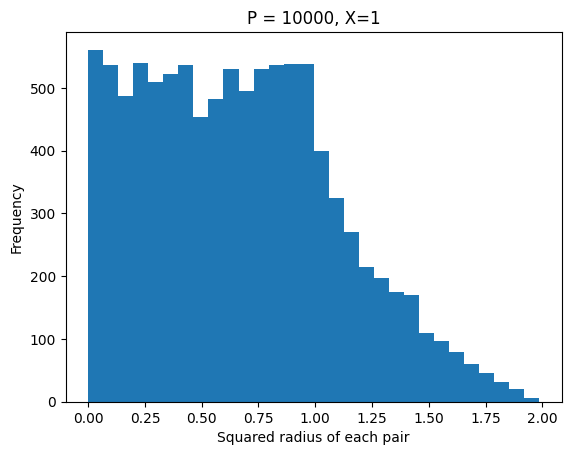

In [ ]:
plt.hist(radius,bins=30)
plt.xlabel("Squared radius of each pair")
plt.ylabel("Frequency")
plt.title("P = 10000, X=1")
plt.show()

The square root of a number that is smaller than 1 will be a bigger number than the number itself. Or the other way around: Taking the square of a radius smaller than 1 will result in a smaller number. The histogram of the squared radii has therefore many more occurences closer to 0 than the histogram of the raddi themselves.
Taking the square of radii larger than 1 will result in larger numbers and we therefore see a stretching towards larger numbers.

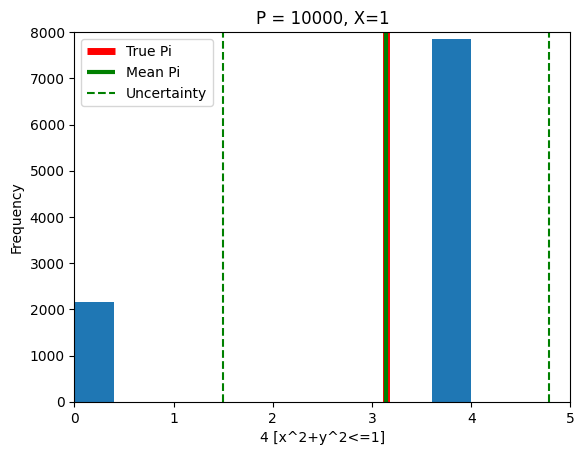

In [ ]:
plt.hist(4*inside_the_circle)
plt.xlabel("4 [x^2+y^2<=1]")
plt.ylabel("Frequency")
plt.title("P = 10000, X=1")
plt.xlim(0,5)
plt.ylim(0,8000)
plt.vlines(np.pi,0,8000,color="red",label="True Pi",linewidth=5)
plt.vlines(mean_pi,0,8000,color="green",label="Mean Pi",linewidth=3)
plt.vlines(mean_pi-std_pi,0,8000,color="green",linestyles='dashed')
plt.vlines(mean_pi+std_pi,0,8000,color="green",linestyles='dashed',label="Uncertainty")
plt.legend()
plt.show()

# 1.2 Split into 100 experiments

In [ ]:
# First we'll generate the points we're interested in for many repeated experiments.

dimension = 2
n_experiments = 100
n_points_per_experiment = 100

points = np.random.uniform(low=-1.0, high=1.0,
                           size=(dimension, n_points_per_experiment, n_experiments, ))
# Next, check whether the points are in the circle
radius = (points**2).sum(axis=0)
inside_the_circle = (radius <= 1)
inside_the_square = ((-1.0 <= points[0]) & (points[0] <= 1.0) &
                     (-1.0 <= points[1]) & (points[1] <= 1.0))

pi_by_4 = inside_the_circle.sum(axis=0) / inside_the_square.sum(axis=0)
pi = 4 * pi_by_4

In [ ]:
mean_pi = np.mean(pi)
std_pi = round(np.std(pi,ddof=1),3) #Calculates std like given in the instructions
print("Mean PI = ", mean_pi)
print("Standard deviation = ",std_pi)

Mean PI =  3.1464
Standard deviation =  0.175


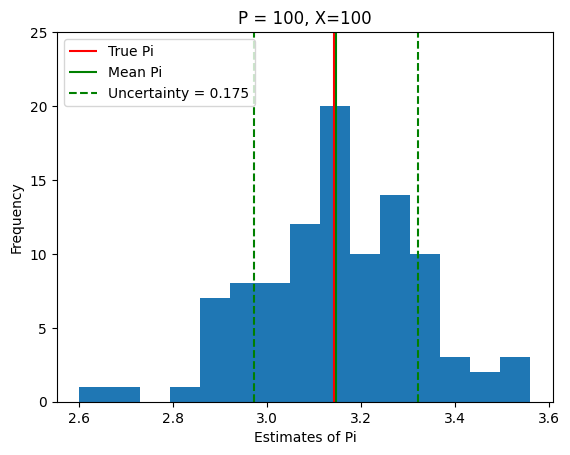

In [ ]:
plt.hist(pi,bins=15)
plt.xlabel("Estimates of Pi")
plt.ylabel("Frequency")
plt.title("P = 100, X=100")
plt.vlines(np.pi,0,30,color="red",label="True Pi")
plt.vlines(mean_pi,0,30,color="green",label="Mean Pi")
plt.vlines(mean_pi-std_pi,0,30,color="green",linestyles='dashed')
plt.vlines(mean_pi+std_pi,0,30,color="green",linestyles='dashed',label=f'Uncertainty = {std_pi}')
plt.ylim(0,25)
plt.legend(loc='upper left')
plt.show()

# 1.3 A Zillion little Experiments

In [ ]:
# First we'll generate the points we're interested in for many repeated experiments.

dimension = 2
n_experiments = 10000
n_points_per_experiment = 1

points = np.random.uniform(low=-1.0, high=1.0,
                           size=(dimension, n_points_per_experiment, n_experiments, ))
# Next, check whether the points are in the circle
radius = (points**2).sum(axis=0)
inside_the_circle = (radius <= 1)
inside_the_square = ((-1.0 <= points[0]) & (points[0] <= 1.0) &
                     (-1.0 <= points[1]) & (points[1] <= 1.0))

pi_by_4 = inside_the_circle.sum(axis=0) / inside_the_square.sum(axis=0)
pi = 4 * pi_by_4

In [ ]:
mean_pi = np.mean(pi)
std_pi = round(np.std(pi,ddof=1),3) #Calculates like given in the instructions
print("Mean PI = ", mean_pi)
print("Standard deviation = ",std_pi)

Mean PI =  3.146
Standard deviation =  1.639


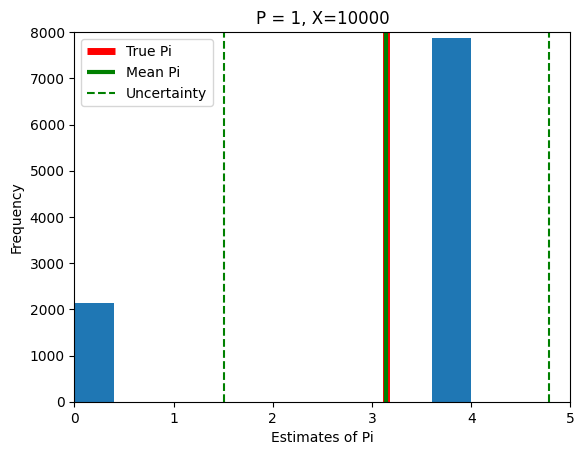

In [ ]:
plt.hist(pi)
plt.xlabel("Estimates of Pi")
plt.ylabel("Frequency")
plt.title("P = 1, X=10000")
plt.xlim(0,5)
plt.ylim(0,8000)
plt.vlines(np.pi,0,8000,color="red",label="True Pi",linewidth=5)
plt.vlines(mean_pi,0,8000,color="green",label="Mean Pi",linewidth=3)
plt.vlines(mean_pi-std_pi,0,8000,color="green",linestyles='dashed')
plt.vlines(mean_pi+std_pi,0,8000,color="green",linestyles='dashed',label="Uncertainty")
plt.legend()
plt.show()

The distriution looks very similar to the histogram of the indicator variable in exercise 1 where we did only one experiment containing 10000 pairs. In the first exercise we check for each pair if the radius is smaller than 1 while in this exercise we check this for every experiment only once. We thereby obtain a similar numbers of pairs inside the circle and therefore a similar mean and standard deviation.
It seems not to make any difference to check 10000 pairs in one experiment or 1 pair in 10000 experiments.

# 1.4 Stop and think


**Answer for question 1:** Comparing the results from the previous exercises with the real value of $\pi$, we can see that they are compatible, as the estimate values of $\pi$ is (approximately) $\pi_{(10000,1)}$=3.1772, $\pi_{(100,100)}$=3.1344 and $\pi_{(1,10000)}$=3.1468 respectively. The real value of $\pi$ up to 10 digits is $\pi$=3.1415926535

**Answer for question 2:** Since using the normal definition of the standard deviation does not make sense with only one sample, we used a different approach in which we defined the standard deviation of the indicator variable as the uncertainty. It makes sense to use this definition because it features the statistical property of the situation (each pair can be either inside or outside the circle) and has the same statistical properties as having 10000 experiments with only one pair (1.3). In exercise 1.3 the normal definition of the standard deviation could be applied, which shows that the definition of the uncertainty in 1.1 is valid.

**Answer for question 3:** As we can observe from the examples we created above, reorganizing the way we ‘spent’ our random numbers has a significant influence in the final uncertainty. By having an equal number of experiments $X=P=\sqrt{XP}$ and points rather than many points in one large experiment ($P=XP$) can reduce the uncertainty drastically, because in the second case the results from the experiments are averaged to give a more precise final estimation of $\pi$ than conducting one large experiment.

# 1.5 More Experiments vs. Longer Experiments

To produce the estimates for the value of $π$ and the uncertainties for each pair of number of points $P$ and number of experiments $X$ we just have to embed the code that produces the $\pi_{x}$ and the uncertainty into a nested `for` loop that runs this snippet of code for each pair $(P,X)$, thus a total of 16 times ($2^4$ total combinations).

In [ ]:
cols = 4
dimension = 2
arr = [10**(i+1) for i in range(cols)] #creating the array of P and X
results=[]
std=[]
pi_array=[]
final_array=[]
for i in arr: #running the code for each pair of P and X
  for j in arr:
    points = np.random.uniform(low=-1.0, high=1.0,
                           size=(dimension, i , j , ))
    # Next, check whether the points are in the circle
    radius = (points**2).sum(axis=0)
    inside_the_circle = (radius <= 1)
    inside_the_square = ((-1.0 <= points[0]) & (points[0] <= 1.0) &
                     (-1.0 <= points[1]) & (points[1] <= 1.0))

    pi_by_4 = inside_the_circle.sum(axis=0) / inside_the_square.sum(axis=0)
    pi = 4 * pi_by_4
    mean_pi = np.mean(pi)
    pi_array=np.append(pi_array,pi) #pi values produced for each P,X
    final_array.append(pi_array)
    pi_array=[] #emptying the array of pi to be filled with the produced values of the next pair of P,X
    std_pi = round(np.std(pi,ddof=1),3)
    results=np.append(results,mean_pi) #estimated value of pi for each P,X
    std=np.append(std,std_pi) #standard deviation for each P,X
r=np.reshape(results, (-1, 4))
s=np.reshape(std, (-1, 4))

Now we have to plot the histograms, the uncertainty and the estimated value of $\pi$ for every combination. It is evident that if all 16 graphs are in the same plot, the result will be impossible to be interpreted. Thus, we decided to split the graphs into 4 parts, each for every $X$ value, as it is shown below.

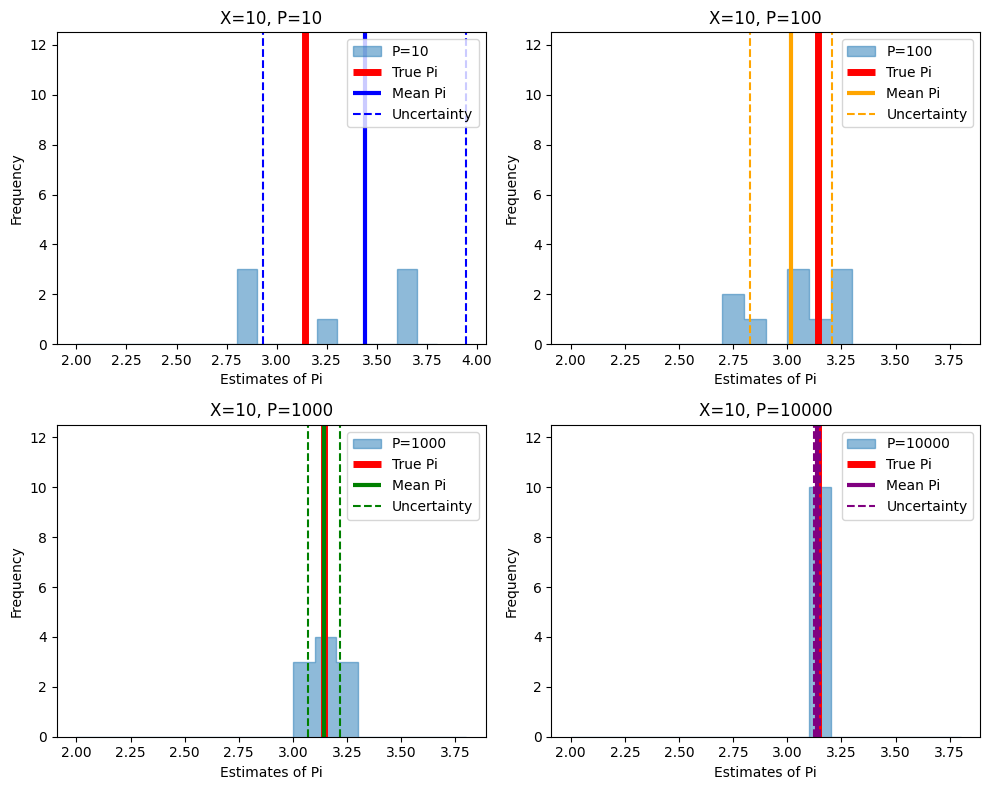

In [ ]:
n_bins = [2 + i / 10 for i in range(19)]  # splitting the interval [2,4] in bins with width of 0.1
colors = ['blue', 'orange', 'green', 'purple']
labels = ["P=10", "P=100", "P=1000", "P=10000"]

plt.figure(figsize=(10, 8))  # Create a new figure with a specified size

for i in range(4):
    plt.subplot(2, 2, i + 1)  # Define a 2x2 grid and place each plot in the appropriate spot

    # Plot histogram
    plt.hist(final_array[4 * i], n_bins, histtype='step', alpha=0.5, fill=True, label=labels[i])
    plt.xlabel("Estimates of Pi")
    plt.ylabel("Frequency")
    # Plot mean and uncertainty lines
    plt.vlines(np.pi,0,8000,color="red",label="True Pi",linewidth=5)
    plt.vlines(results[4 * i], 0, 12.5, color=colors[i], label="Mean Pi", linewidth=3)
    plt.vlines(results[4 * i] - std[4 * i], 0, 12.5, color=colors[i], linestyles='dashed')
    plt.vlines(results[4 * i] + std[4 * i], 0, 12.5, color=colors[i], linestyles='dashed', label="Uncertainty")

    plt.legend(loc="upper right")
    plt.ylim(0, 12.5)  # Set consistent y-limits across all plots
    plt.title(f'X=10, {labels[i]}')

plt.tight_layout()  # Adjust layout to prevent overlap of subplots
plt.show()

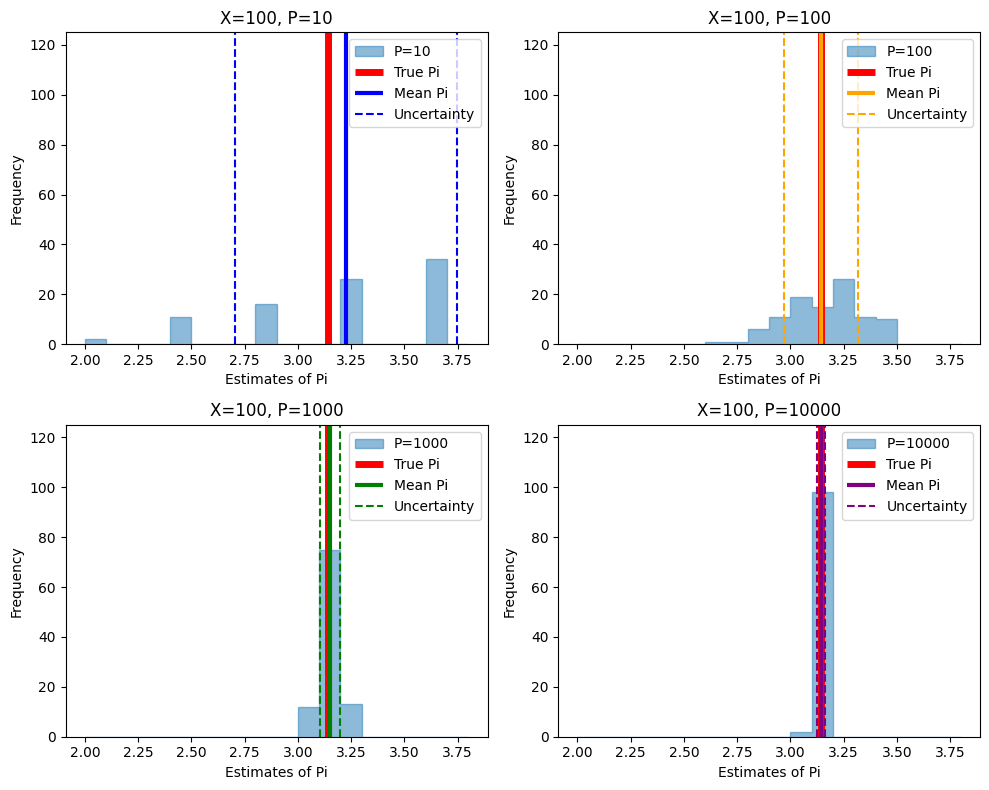

In [ ]:
n_bins = [2 + i / 10 for i in range(19)]  # Splitting the interval [2,4] into bins with a width of 0.1
colors = ['blue', 'orange', 'green', 'purple']
labels = ["P=10", "P=100", "P=1000", "P=10000"]

plt.figure(figsize=(10, 8))  # Create a new figure with a specified size

for i in range(4):
    plt.subplot(2, 2, i + 1)  # Define a 2x2 grid and place each plot in the appropriate spot

    # Plot histogram
    plt.hist(final_array[4 * i + 1], n_bins, histtype='step', alpha=0.5, fill=True, label=labels[i])
    plt.xlabel("Estimates of Pi")
    plt.ylabel("Frequency")
    # Plot mean and uncertainty lines
    plt.vlines(np.pi,0,8000,color="red",label="True Pi",linewidth=5)
    plt.vlines(results[4 * i + 1], 0, 125, color=colors[i], label="Mean Pi", linewidth=3)
    plt.vlines(results[4 * i + 1] - std[4 * i + 1], 0, 125, color=colors[i], linestyles='dashed')
    plt.vlines(results[4 * i + 1] + std[4 * i + 1], 0, 125, color=colors[i], linestyles='dashed', label="Uncertainty")

    plt.legend(loc="upper right")
    plt.ylim(0, 125)  # Set consistent y-limits across all plots
    plt.title(f'X=100, {labels[i]}')

plt.tight_layout()  # Adjust layout to prevent overlap of subplots
plt.show()

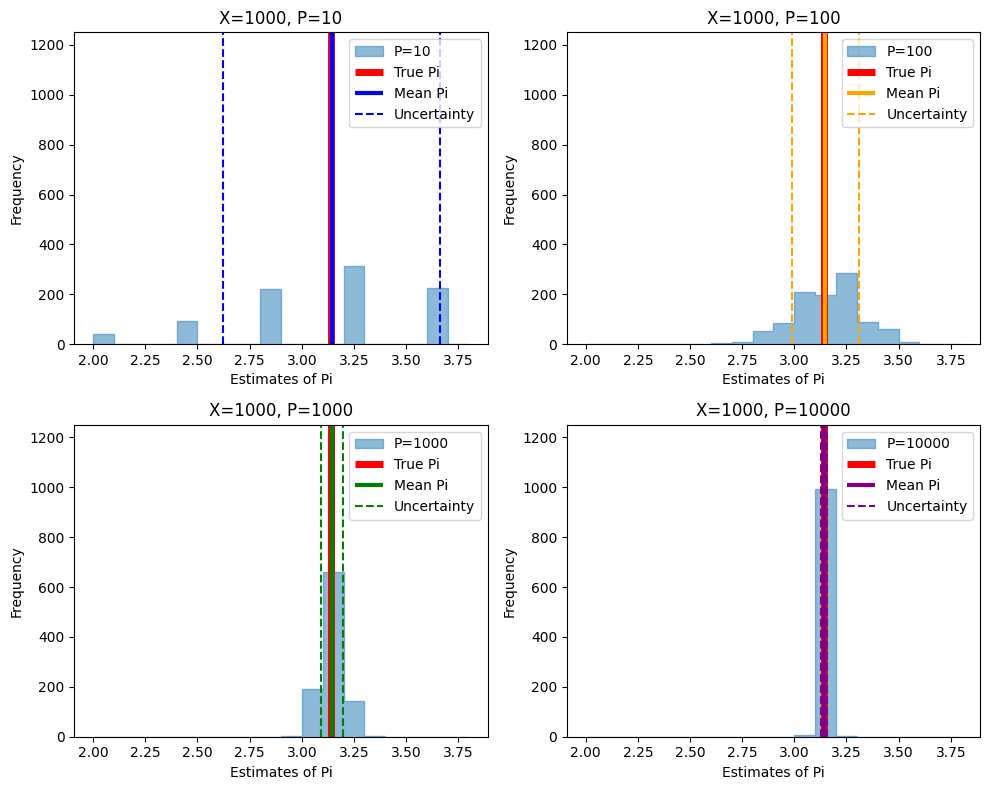

In [ ]:
n_bins = [2 + i / 10 for i in range(19)]  # Splitting the interval [2,4] into bins with a width of 0.1
colors = ['blue', 'orange', 'green', 'purple']
labels = ["P=10", "P=100", "P=1000", "P=10000"]

plt.figure(figsize=(10, 8))  # Create a new figure with a specified size

for i in range(4):
    plt.subplot(2, 2, i + 1)  # Define a 2x2 grid and place each plot in the appropriate spot

    # Plot histogram
    plt.hist(final_array[4 * i + 2], n_bins, histtype='step', alpha=0.5, fill=True, label=labels[i])
    plt.xlabel("Estimates of Pi")
    plt.ylabel("Frequency")
    # Plot mean and uncertainty lines
    plt.vlines(np.pi,0,8000,color="red",label="True Pi",linewidth=5)
    plt.vlines(results[4 * i + 2], 0, 1250, color=colors[i], label="Mean Pi", linewidth=3)
    plt.vlines(results[4 * i + 2] - std[4 * i + 2], 0, 1250, color=colors[i], linestyles='dashed')
    plt.vlines(results[4 * i + 2] + std[4 * i + 2], 0, 1250, color=colors[i], linestyles='dashed', label="Uncertainty")

    plt.legend(loc="upper right")
    plt.ylim(0, 1250)  # Set consistent y-limits across all plots
    plt.title(f'X=1000, {labels[i]}')

plt.tight_layout()  # Adjust layout to prevent overlap of subplots
plt.show()

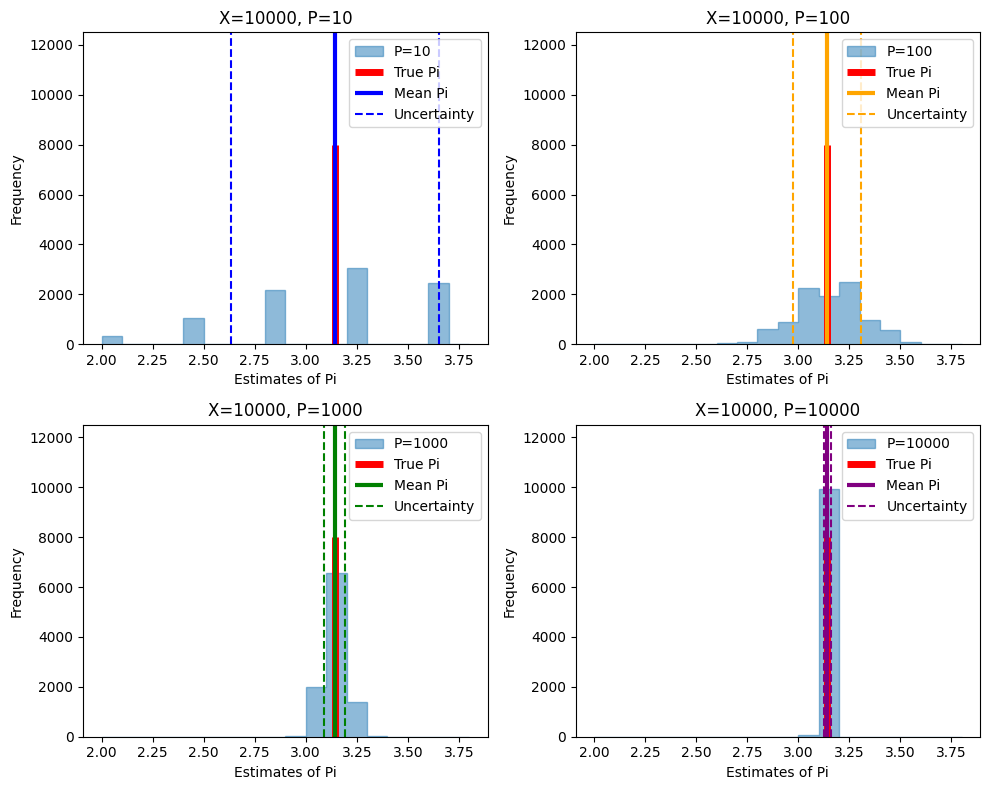

In [ ]:
n_bins = [2 + i / 10 for i in range(19)]  # Splitting the interval [2,4] into bins with a width of 0.1
colors = ['blue', 'orange', 'green', 'purple']
labels = ["P=10", "P=100", "P=1000", "P=10000"]

plt.figure(figsize=(10, 8))  # Create a new figure with a specified size

for i in range(4):
    plt.subplot(2, 2, i + 1)  # Define a 2x2 grid and place each plot in the appropriate spot

    # Plot histogram
    plt.hist(final_array[4 * i + 3], n_bins, histtype='step', alpha=0.5, fill=True, label=labels[i])
    plt.xlabel("Estimates of Pi")
    plt.ylabel("Frequency")
    # Plot mean and uncertainty lines
    plt.vlines(np.pi,0,8000,color="red",label="True Pi",linewidth=5)
    plt.vlines(results[4 * i + 3], 0, 12500, color=colors[i], label="Mean Pi", linewidth=3)
    plt.vlines(results[4 * i + 3] - std[4 * i + 3], 0, 12500, color=colors[i], linestyles='dashed')
    plt.vlines(results[4 * i + 3] + std[4 * i + 3], 0, 12500, color=colors[i], linestyles='dashed', label="Uncertainty")

    plt.legend(loc="upper right")
    plt.ylim(0, 12500)  # Set consistent y-limits across all plots
    plt.title(f'X=10000, {labels[i]}')

plt.tight_layout()  # Adjust layout to prevent overlap of subplots
plt.show()

Using the 16 histograms and their uncertainties above, we can conclude that if we have a fixed number $XP$ for all the experiments, the better strategy is to spend most of them into the number of points $P$ rather than the number of experiments $X$. Ideally, we should have $P\gg X$. For example, if $XP=10000$, then we can have the combinations $(X,P)=(10,1000),(100,100),(1000,10)$. The uncertainties are $std_{10,1000}\approx0.075$, $std_{100,100}\approx0.174$ and $std_{1000,10}\approx0.52$ respectively. Observing their respective histograms and their uncertainty lines, we can see that for $(10,1000)$ the lines are significantly closer to the estimated value of $\pi$, compared to the other two combinations.

Below we print the matrices of the mean estimated values of $\pi$ and of the standard deviation for each combination of $P$ and $X$ as a $4\times4$ matrix with the form below:
$$
\begin{aligned}
&\begin{array}{ccccc}
\hline \hline \text {  } & \text { $X_{10}$ } & \text { $X_{100}$ } & \text { $X_{1000}$ } & \text { $X_{10000}$ }\\
\hline P_{10} & \pi_{(10,10)} & \pi_{(100,10)} & \pi_{(1000,10)} & \pi_{(10000,10)}\\
P_{100} & \pi_{(10,100)} & \pi_{(100,100)} & \pi_{(1000,100)} & \pi_{(10000,100)} \\
P_{1000} & \pi_{(10,1000)} & \pi_{(100,1000)} & \pi_{(1000,1000)} & \pi_{(10000,1000)} \\
P_{10000} & \pi_{(10,10000)} & \pi_{(100,10000)} & \pi_{(1000,10000)} & \pi_{(10000,10000)} \\
\hline
\end{array}
\end{aligned}
$$

In [ ]:
print(r)

[[3.44      3.224     3.144     3.14364  ]
 [3.016     3.1456    3.14908   3.141264 ]
 [3.1436    3.15172   3.14506   3.1415688]
 [3.13748   3.143168  3.14157   3.1419772]]


Same principal for the printing of the standard deviation for each combination of $P$ and $X$

In [ ]:
print(s)

[[0.506 0.521 0.52  0.511]
 [0.19  0.174 0.159 0.165]
 [0.075 0.048 0.053 0.052]
 [0.013 0.017 0.016 0.017]]


We plot standard deviation as a function of $X$ for each $P$ as it is shown below:

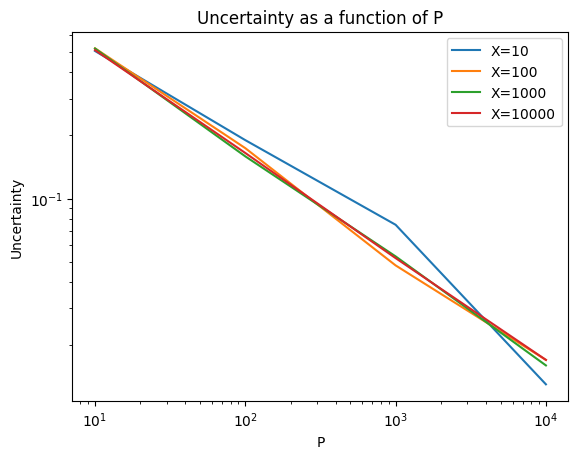

In [ ]:
plt.loglog(arr, s[:,0], label = "X=10")
plt.loglog(arr, s[:,1], label = "X=100")
plt.loglog(arr, s[:,2], label = "X=1000")
plt.loglog(arr, s[:,3], label = "X=10000")
plt.title('Uncertainty as a function of P')
plt.xlabel("P")
plt.ylabel("Uncertainty")
plt.legend()
plt.show()

We plot standard deviation as a function of $P$ for each $X$ as it is shown below:

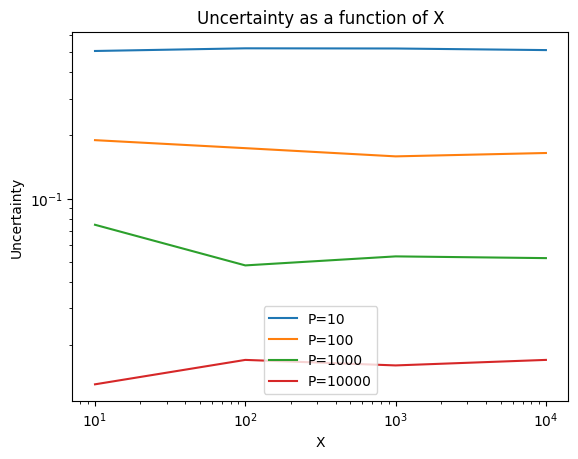

In [ ]:
plt.loglog(arr, s[0], label = "P=10")
plt.loglog(arr, s[1], label = "P=100")
plt.loglog(arr, s[2], label = "P=1000")
plt.loglog(arr, s[3], label = "P=10000")
plt.xlabel("X")
plt.ylabel("Uncertainty")
plt.title("Uncertainty as a function of X")
plt.legend()
plt.show()

From the graphs above, we can observe that there is an important reduction of the uncertainty with the increase of the number of points $P$. In the contrary, with the increase of the number of experiments $X$ the uncertainty remains almost contstant. More points tends to be more effective per experiment because directly increasing the resolution (number of points) reduces the randomness of the estimate. More experiments helps, but less dramatically. After a certain number of experiments, the benefits from additional experiments diminish (due to averaging), whereas adding more points continues to improve precision. Based on this observation, we can conclude that, increasing the number of experiments is more important than increasing the number of points in this computation of the constant $\pi$.


